### Quantum Fisher Information matrix

<img src="others\qfim.png">

I have coded QFIM function and test it on 1qubit case

$\partial_\theta|\psi\rangle$ can be calculated by on the below equation (from Le Bin Ho):

<img src="others/grad_psi.png"/>

In [8]:
import qiskit
import numpy as np
import qtm.base_qtm, qtm.constant, qtm.qtm_1qubit, qtm.qtm_nqubit
import matplotlib.pyplot as plt
from types import FunctionType

In [10]:
# Init quantum tomography 1 qubit
def a(qc, thetas):
    qc.h(0)
    qc.rz(thetas[0], 0)
    return qc
thetas = np.zeros((1,))
qc = qiskit.QuantumCircuit(1, 1)


grad_psi1 = qtm.base_qtm.grad_psi(qc.copy(), a, thetas, r = 1/2, s = np.pi)
print(grad_psi1)

qc_copy = a(qc.copy(), thetas)
psi = qiskit.quantum_info.Statevector.from_instruction(qc_copy).data
# Create gradient of loss function
# Quantum natural gradient
F = qtm.quantum_fisher.create_QFIM(psi, grad_psi1)
print(F)
    

[[2.16489014e-17-0.35355339j 2.16489014e-17+0.35355339j]]
[[1.]]


In [10]:
num_qubits = 3
theta = np.random.uniform(0, 2*np.pi)
thetas = np.ones((2*num_qubits*3))
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_ghz_state(qc, theta)
loss_values_qng = []
for i in range(0, 100):
    grad_psi1 = (grad_psi(qc, qtm.qtm_nqubit.u_cluster_nqubit, thetas, r = 1/2, s = np.pi/2))
    grad_loss = qtm.base_qtm.grad_loss(qc, qtm.qtm_nqubit.u_cluster_nqubit, thetas, r = 1/2, s = np.pi)
    qc_copy = qtm.qtm_nqubit.u_cluster_nqubit(qc.copy(), thetas)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc_copy).data
    # Create gradient of loss function
    # Quantum natural gradient
    thetas = qng(thetas, psi, grad_psi1, grad_loss)
    qc_copy2 = qtm.qtm_nqubit.u_cluster_nqubit(qc.copy(), thetas)
    loss = qtm.base_qtm.loss_basis(qtm.base_qtm.measure(qc_copy2, range(qc_copy2.num_qubits)))
    loss_values_qng.append(loss)

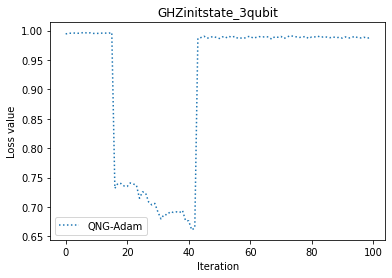

In [11]:
# Plot loss value in 100 steps

plt.plot(loss_values_qng, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 